In [275]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [276]:
df = pd.read_csv('customer_churn_data.csv')

In [277]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [278]:
df.shape

(7043, 21)

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [280]:
col_countplot = ['gender','SeniorCitizen','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

Dataset has no missing values as all have 7043 null values

In [281]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


We can observe from the above cell that mean tenure of all the customer is ~32 months and average monthly charge is ~$64

### Lets find out about contract types 

In [282]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

So there are three type of contracts that is monthly based,one year and two year.

In [283]:
col_countplot = ['gender','SeniorCitizen','PhoneService','MultipleLines','InternetService','OnlineSecurity','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

In [284]:
len(col_countplot)

12

## Lets plot some graph to get some insight about the dataset 

In [285]:
''''nrow = 4
ncol = 3

fig,sub = plt.subplots(nrows=nrow,ncols=ncol,figsize=(20,20),facecolor='white')
for i in range(nrow):
    for j in range(ncol):
        sub[(i,j)]
        '''

"'nrow = 4\nncol = 3\n\nfig,sub = plt.subplots(nrows=nrow,ncols=ncol,figsize=(20,20),facecolor='white')\nfor i in range(nrow):\n    for j in range(ncol):\n        sub[(i,j)]\n        "

#### lets see distribution of gender

<AxesSubplot:xlabel='gender', ylabel='count'>

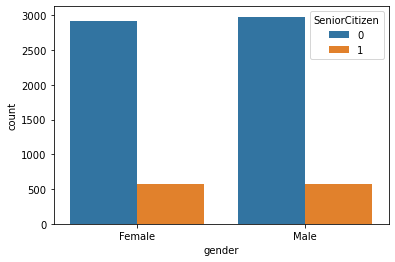

In [286]:
sb.countplot(data=df,x='gender',hue='SeniorCitizen')

We can observbe from the above viz that dataset contains equal number of both the genders and same numbers of senior citizen.

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

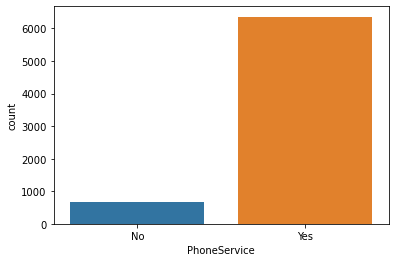

In [287]:
sb.countplot(data=df,x='PhoneService')

We can see that most people have not signed up for the phone service.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

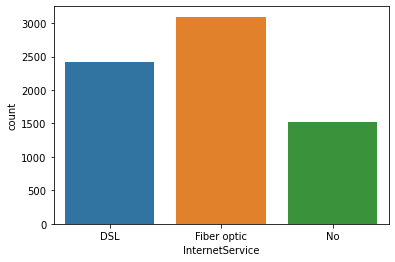

In [288]:
sb.countplot(data=df,x='InternetService')

Fiber optic based internet service is the dominant tecnology followed by dsl.

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

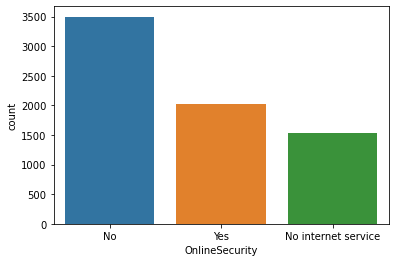

In [289]:
sb.countplot(data=df,x='OnlineSecurity')

Most people don't look intrested in online security.

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

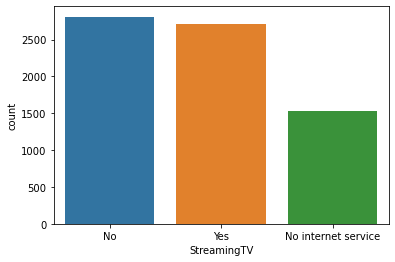

In [290]:
sb.countplot(data=df,x='StreamingTV')

good number of customers are intrested in streaming-tv

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

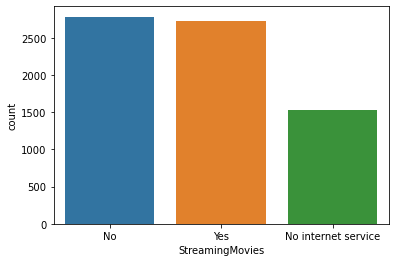

In [291]:
sb.countplot(data=df,x='StreamingMovies')

<AxesSubplot:xlabel='Contract', ylabel='count'>

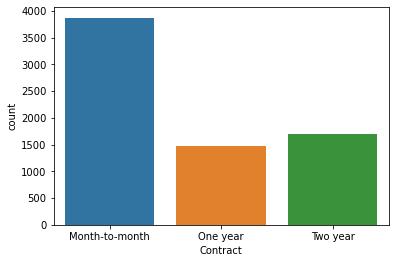

In [292]:
sb.countplot(data=df,x='Contract')

Most customers are on month-to-month based contracts  followed by customers with one year contract and two year contract. We can say twice the number of customers are relying on month-to-month contract than  yearly based contracts.

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

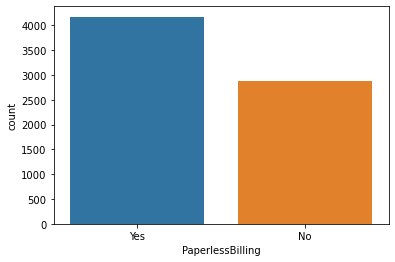

In [293]:
sb.countplot(data=df,x='PaperlessBilling')

We can see paperless billing is gaining pace among customers day by day. Paper less billing is profitable for companies since they don't have to hire staff and resources for handling all those paper bills.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

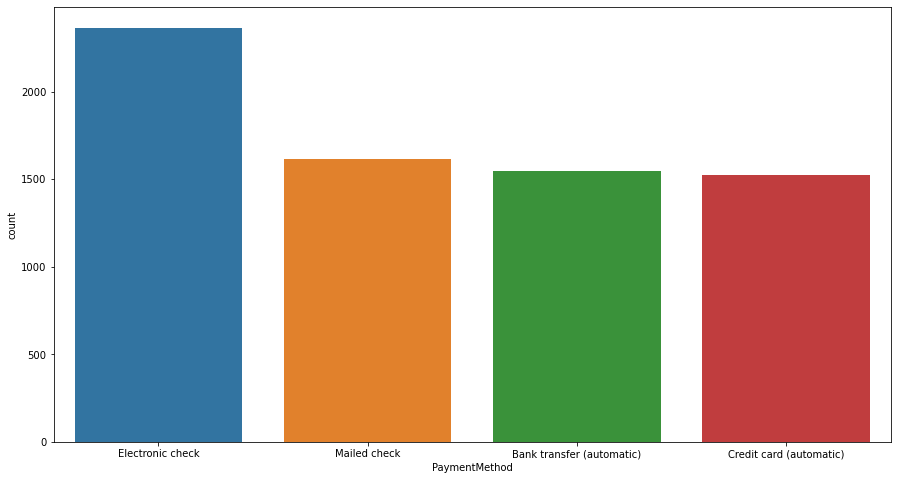

In [294]:
plt.figure(figsize=(15,8))
sb.countplot(data=df,x='PaymentMethod')

In [295]:
def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

We can see digital payments are taking over.

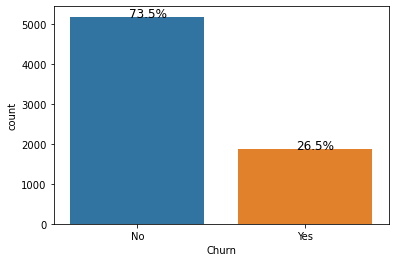

In [296]:
ax = sb.countplot(data=df,x='Churn')
without_hue(ax,df.Churn)

## There are several categorical variables in this dataset and we need to do something about them. 

We will label encode categorical variables with two unique values and for categorical variables with more than two unique values we use label encoding and one hot encoding

In [297]:
from sklearn import preprocessing 
LE = preprocessing.LabelEncoder()

####  Now we will use a loop over categorical variables

In [298]:
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <=2:
            LE.fit(df[col])
            df[col] = LE.transform(df[col])
            le_count +=1
print("{} columns were label encoded".format(le_count))

6 columns were label encoded


In [299]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Checking the covariance between variables

In [300]:
covi = np.cov(df.SeniorCitizen,df.Churn)

In [301]:
covi

array([[0.13587452, 0.02455944],
       [0.02455944, 0.19497639]])

In [302]:
np.var(df.SeniorCitizen)

0.13585522365412622

In [303]:
from scipy.stats import pearsonr

In [304]:
corr, _ = pearsonr(df.SeniorCitizen,df.Churn)

In [305]:
corr

0.1508893281764731

In [306]:
df2 = df[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges','Churn']]

In [307]:
df2.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,29.85,29.85,0
1,0,0,0,34,1,0,56.95,1889.5,0
2,0,0,0,2,1,1,53.85,108.15,1
3,0,0,0,45,0,0,42.30,1840.75,0
4,0,0,0,2,1,1,70.70,151.65,1


In [308]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int32  
 2   Dependents        7043 non-null   int32  
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   int32  
 5   PaperlessBilling  7043 non-null   int32  
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   int32  
dtypes: float64(1), int32(5), int64(2), object(1)
memory usage: 357.8+ KB


In [309]:
from scipy.stats import spearmanr

In [310]:
list_tot_charg = list(df2.TotalCharges.astype(str))

In [311]:
list_tot_charg  = [x.strip() for x in list_tot_charg]

In [312]:
df2.drop('TotalCharges',axis=1,inplace=True)

C:\Users\mkmy\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [313]:
df2['TotalCharges'] = list_tot_charg

C:\Users\mkmy\AppData\Local\Temp/ipykernel_14560/3601792853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TotalCharges'] = list_tot_charg


In [314]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int32  
 2   Dependents        7043 non-null   int32  
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   int32  
 5   PaperlessBilling  7043 non-null   int32  
 6   MonthlyCharges    7043 non-null   float64
 7   Churn             7043 non-null   int32  
 8   TotalCharges      7043 non-null   object 
dtypes: float64(1), int32(5), int64(2), object(1)
memory usage: 357.8+ KB


In [315]:
sum(df2.TotalCharges=='')

11

In [316]:
df2[df2.TotalCharges=='']

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,TotalCharges
488,0,1,1,0,0,1,52.55,0,
753,0,0,1,0,1,0,20.25,0,
936,0,1,1,0,1,0,80.85,0,
1082,0,1,1,0,1,0,25.75,0,
1340,0,1,1,0,0,0,56.05,0,
3331,0,1,1,0,1,0,19.85,0,
3826,0,1,1,0,1,0,25.35,0,
4380,0,1,1,0,1,0,20.00,0,
5218,0,1,1,0,1,1,19.70,0,
6670,0,1,1,0,1,0,73.35,0,


In [317]:
df2 = df2[df2.TotalCharges != '']

In [318]:
df2.TotalCharges = df2.TotalCharges.astype(str).astype(float)

In [319]:
df2.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,TotalCharges
0,0,1,0,1,0,1,29.85,0,29.85
1,0,0,0,34,1,0,56.95,0,1889.50
2,0,0,0,2,1,1,53.85,1,108.15
3,0,0,0,45,0,0,42.30,0,1840.75
4,0,0,0,2,1,1,70.70,1,151.65


In [320]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   Partner           7032 non-null   int32  
 2   Dependents        7032 non-null   int32  
 3   tenure            7032 non-null   int64  
 4   PhoneService      7032 non-null   int32  
 5   PaperlessBilling  7032 non-null   int32  
 6   MonthlyCharges    7032 non-null   float64
 7   Churn             7032 non-null   int32  
 8   TotalCharges      7032 non-null   float64
dtypes: float64(2), int32(5), int64(2)
memory usage: 412.0 KB


In [321]:
df.shape

(7043, 21)

In [322]:
df2.shape

(7032, 9)

In [323]:
col_name = []
corr_coef = []

In [324]:
for i in df2.columns:
    corr,_ =pearsonr(df2[i],df2.Churn)
    col_name.append(i)
    corr_coef.append(corr)

In [325]:
df3 = pd.DataFrame(list(zip(col_name, corr_coef)),
               columns =['attribute', 'corr_coef'])

<AxesSubplot:xlabel='attribute', ylabel='corr_coef'>

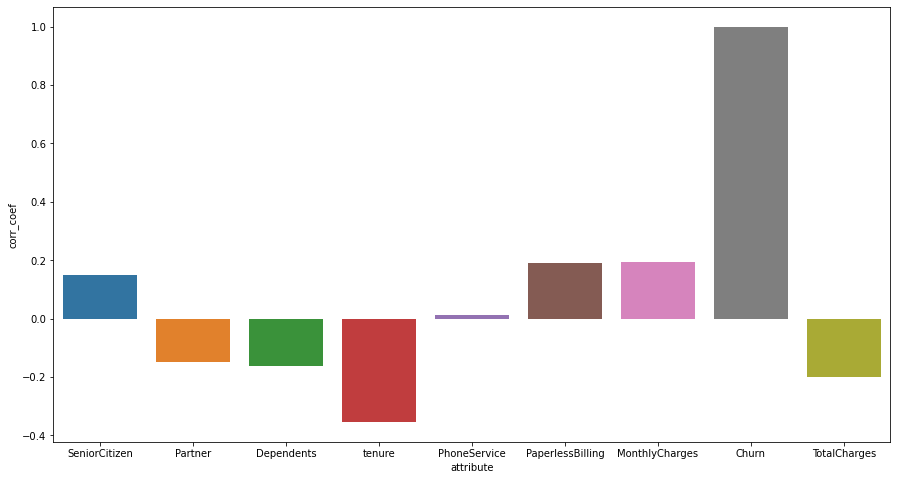

In [326]:
plt.figure(figsize=(15,8))
sb.barplot(data=df3,x='attribute',y='corr_coef')

### Now we will plot correlation matrix 

<AxesSubplot:>

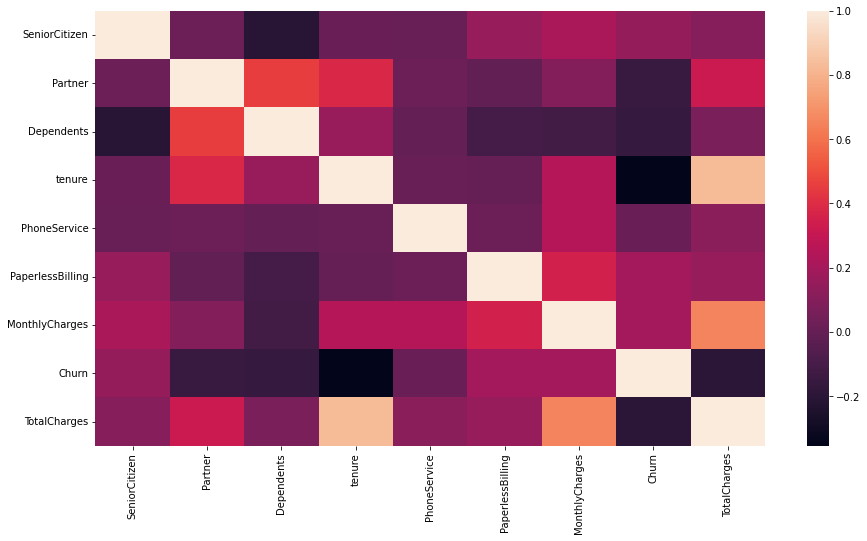

In [327]:
plt.figure(figsize=(15,8))
sb.heatmap(df2.corr())

## Now we will check for multicolinearity 

The key purpose of a regression equation is to tell us the individual impact of each of the explanatory variables on the dependent/target variable and that is captured by the regression coefficients.
So, a regression coefficient captures the average change in the dependent variable for 1 unit change in the explanatory variable, keeping all the other explanatory variables constant. Hence, if the explanatory variables are correlated it will not be possible to disentangle their individual effects on the target variable. This problem is known as <b>multicollinearity</b>. 

In [328]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [329]:
X = add_constant(df2)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

C:\Users\mkmy\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const               22.585330
SeniorCitizen        1.119666
Partner              1.458263
Dependents           1.366070
tenure               6.036191
PhoneService         1.085214
PaperlessBilling     1.179457
MonthlyCharges       3.916534
Churn                1.322484
TotalCharges         9.757345
dtype: float64

We can see tenure and totalcharges have high VIF(>5)

#### We will try to use scatter plot to see the relationship between these two variables

<AxesSubplot:xlabel='TotalCharges', ylabel='tenure'>

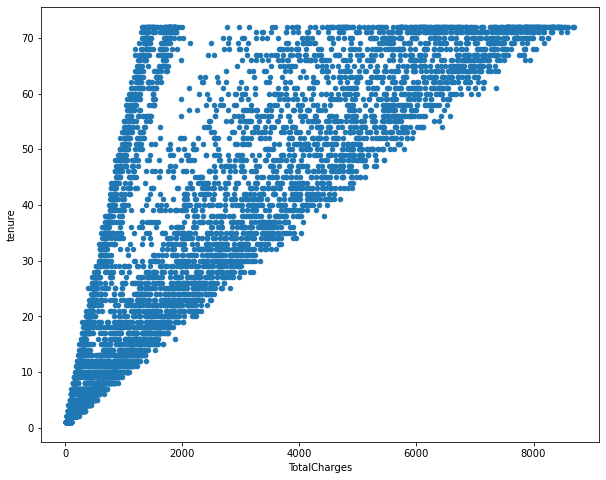

In [330]:
df2[['TotalCharges','tenure']].plot.scatter(x='TotalCharges',y='tenure',figsize=(10,8))

Now we will drop one of columns with high VIF to see if it helps in bring down the multicolinearity of among variables

In [331]:
df4 = df2.drop('TotalCharges',axis=1)

In [332]:
X2 = add_constant(df4)
pd.Series([variance_inflation_factor(X2.values, i) 
               for i in range(X2.shape[1])], 
              index=X2.columns)

const               15.027467
SeniorCitizen        1.118698
Partner              1.458157
Dependents           1.365927
tenure               1.470087
PhoneService         1.082756
PaperlessBilling     1.178335
MonthlyCharges       1.467009
Churn                1.297790
dtype: float64

VIF drops significantly for all variables